## Importando as bibliotecas

In [440]:
import pandas as pd
import numpy as np
import math
from numpy import absolute
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### Dólar Dataset

In [441]:
df_dolar = pd.read_csv("USD_BRL.csv", sep=';')
df_dolar

,Data,Último,Abertura,Máxima,Mínima,Var%
0,abr/22,"4,7289","4,7408","4,773","4,581","-0,21%"
1,mar/22,"4,739","5,1605","5,2233","4,7148","-8,16%"
2,fev/22,"5,1599","5,2983","5,3509","4,9939","-2,73%"
3,jan/22,"5,3046","5,5668","5,7255","5,2832","-4,79%"
4,dez/21,"5,5713","5,6249","5,758","5,5181","-0,94%"
...,...,...,...,...,...,...
263,mai/00,"1,824","1,799","1,86","1,796","1,05%"
264,abr/00,"1,805","1,736","1,817","1,736","3,77%"
265,mar/00,"1,7395","1,7675","1,7695","1,7085","-1,61%"
266,fev/00,"1,768","1,784","1,799","1,756","-0,90%"


In [442]:
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      268 non-null    object
 1   Último    268 non-null    object
 2   Abertura  268 non-null    object
 3   Máxima    268 non-null    object
 4   Mínima    268 non-null    object
 5   Var%      268 non-null    object
dtypes: object(6)
memory usage: 12.7+ KB


In [443]:
df_dolar = df_dolar.drop(["Abertura", "Máxima", "Mínima"], axis=1)
df_dolar

,Data,Último,Var%
0,abr/22,"4,7289","-0,21%"
1,mar/22,"4,739","-8,16%"
2,fev/22,"5,1599","-2,73%"
3,jan/22,"5,3046","-4,79%"
4,dez/21,"5,5713","-0,94%"
...,...,...,...
263,mai/00,"1,824","1,05%"
264,abr/00,"1,805","3,77%"
265,mar/00,"1,7395","-1,61%"
266,fev/00,"1,768","-0,90%"


In [444]:
df_dolar["Último"] = df_dolar["Último"].str.replace(",",".")
df_dolar = df_dolar.astype({"Último":"float"})
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    268 non-null    object 
 1   Último  268 non-null    float64
 2   Var%    268 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [445]:
df_dolar["Data"] = df_dolar["Data"].str.replace("jan","01/01")
df_dolar["Data"] = df_dolar["Data"].str.replace("fev","01/02")
df_dolar["Data"] = df_dolar["Data"].str.replace("mar","01/03")
df_dolar["Data"] = df_dolar["Data"].str.replace("abr","01/04")
df_dolar["Data"] = df_dolar["Data"].str.replace("mai","01/05")
df_dolar["Data"] = df_dolar["Data"].str.replace("jun","01/06")
df_dolar["Data"] = df_dolar["Data"].str.replace("jul","01/07")
df_dolar["Data"] = df_dolar["Data"].str.replace("ago","01/08")
df_dolar["Data"] = df_dolar["Data"].str.replace("set","01/09")
df_dolar["Data"] = df_dolar["Data"].str.replace("out","01/10")
df_dolar["Data"] = df_dolar["Data"].str.replace("nov","01/11")
df_dolar["Data"] = df_dolar["Data"].str.replace("dez","01/12")
df_dolar["Data"] = pd.to_datetime(df_dolar["Data"])
df_dolar = df_dolar.sort_values(by=['Data'])
df_dolar

,Data,Último,Var%
267,2000-01-01,1.7840,"-1,19%"
266,2000-01-02,1.7680,"-0,90%"
265,2000-01-03,1.7395,"-1,61%"
264,2000-01-04,1.8050,"3,77%"
263,2000-01-05,1.8240,"1,05%"
...,...,...,...
4,2021-01-12,5.5713,"-0,94%"
3,2022-01-01,5.3046,"-4,79%"
2,2022-01-02,5.1599,"-2,73%"
1,2022-01-03,4.7390,"-8,16%"


In [446]:
df_dolar = df_dolar.iloc[:-2 , :]
df_dolar

,Data,Último,Var%
267,2000-01-01,1.7840,"-1,19%"
266,2000-01-02,1.7680,"-0,90%"
265,2000-01-03,1.7395,"-1,61%"
264,2000-01-04,1.8050,"3,77%"
263,2000-01-05,1.8240,"1,05%"
...,...,...,...
6,2021-01-10,5.6388,"3,59%"
5,2021-01-11,5.6244,"-0,26%"
4,2021-01-12,5.5713,"-0,94%"
3,2022-01-01,5.3046,"-4,79%"


In [447]:
df_dolar.columns = df_dolar.columns.str.replace("Var%", "Var")
df_dolar["Var"] = df_dolar["Var"].str.replace("%","")
df_dolar["Var"] = df_dolar["Var"].str.replace(",",".")
df_dolar = df_dolar.astype({"Var":"float"})
df_dolar

C:\Users\User\AppData\Local\Temp\ipykernel_14492\1869488242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dolar["Var"] = df_dolar["Var"].str.replace("%","")
C:\Users\User\AppData\Local\Temp\ipykernel_14492\1869488242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dolar["Var"] = df_dolar["Var"].str.replace(",",".")


,Data,Último,Var
267,2000-01-01,1.7840,-1.19
266,2000-01-02,1.7680,-0.90
265,2000-01-03,1.7395,-1.61
264,2000-01-04,1.8050,3.77
263,2000-01-05,1.8240,1.05
...,...,...,...
6,2021-01-10,5.6388,3.59
5,2021-01-11,5.6244,-0.26
4,2021-01-12,5.5713,-0.94
3,2022-01-01,5.3046,-4.79


In [448]:
df_dolar = df_dolar.set_index("Data")
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2000-01-01 to 2022-01-02
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Último  266 non-null    float64
 1   Var     266 non-null    float64
dtypes: float64(2)
memory usage: 6.2 KB


### Selic Dataset

In [449]:
df_selic = pd.read_csv("Selic.csv", sep=';')
df_selic

,data,valor
0,01/06/1986,"1,27"
1,01/07/1986,"1,95"
2,01/08/1986,"2,57"
3,01/09/1986,"2,94"
4,01/10/1986,"1,96"
...,...,...
426,01/12/2021,"0,77"
427,01/01/2022,"0,73"
428,01/02/2022,"0,76"
429,01/03/2022,"0,93"


In [312]:
df_selic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    431 non-null    object
 1   valor   431 non-null    object
dtypes: object(2)
memory usage: 6.9+ KB


In [450]:
df_selic["valor"] = df_selic["valor"].str.replace(",",".")
df_selic = df_selic.astype({"valor":"float"})
df_selic.columns = df_selic.columns.str.replace("valor", "valor_selic")
df_selic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   data         431 non-null    object 
 1   valor_selic  431 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


In [451]:
df_selic["data"] = pd.to_datetime(df_selic["data"])
df_selic = df_selic.sort_values(by=['data'])
df_selic

,data,valor_selic
0,1986-01-06,1.27
1,1986-01-07,1.95
2,1986-01-08,2.57
3,1986-01-09,2.94
4,1986-01-10,1.96
...,...,...
426,2021-01-12,0.77
427,2022-01-01,0.73
428,2022-01-02,0.76
429,2022-01-03,0.93


In [452]:
df_selic = df_selic.drop(range(0,163))
df_selic = df_selic.iloc[:-2 , :]
df_selic

,data,valor_selic
163,2000-01-01,1.46
164,2000-01-02,1.45
165,2000-01-03,1.45
166,2000-01-04,1.30
167,2000-01-05,1.49
...,...,...
424,2021-01-10,0.49
425,2021-01-11,0.59
426,2021-01-12,0.77
427,2022-01-01,0.73


In [453]:
df_selic = df_selic.set_index("data")
df_selic

,valor_selic
data,
2000-01-01,1.46
2000-01-02,1.45
2000-01-03,1.45
2000-01-04,1.30
2000-01-05,1.49
...,...
2021-01-10,0.49
2021-01-11,0.59
2021-01-12,0.77


### IPCA Dataset

In [454]:
df_ipca = pd.read_csv("Ipca.csv", sep=';')
df_ipca

,Data,Var Mensal
0,jan/80,"6,62"
1,fev/80,"4,62"
2,mar/80,"6,04"
3,abr/80,"5,29"
4,mai/80,"5,7"
...,...,...
502,nov/21,"0,95"
503,dez/21,"0,73"
504,jan/22,"0,54"
505,fev/22,"1,01"


In [455]:
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        507 non-null    object
 1   Var Mensal  507 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [456]:
df_ipca = df_ipca.iloc[:-1 , :]
df_ipca = df_ipca.drop(range(0,240))
df_ipca

,Data,Var Mensal
240,jan/00,"0,62"
241,fev/00,"0,13"
242,mar/00,"0,22"
243,abr/00,"0,42"
244,mai/00,"0,01"
...,...,...
501,out/21,"1,25"
502,nov/21,"0,95"
503,dez/21,"0,73"
504,jan/22,"0,54"


In [457]:
df_ipca.columns = df_ipca.columns.str.replace("Var Mensal", "var_ipca")
df_ipca

,Data,var_ipca
240,jan/00,"0,62"
241,fev/00,"0,13"
242,mar/00,"0,22"
243,abr/00,"0,42"
244,mai/00,"0,01"
...,...,...
501,out/21,"1,25"
502,nov/21,"0,95"
503,dez/21,"0,73"
504,jan/22,"0,54"


In [458]:
df_ipca["var_ipca"] = df_ipca["var_ipca"].str.replace(",",".")
df_ipca = df_ipca.astype({"var_ipca":"float"})
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 240 to 505
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      266 non-null    object 
 1   var_ipca  266 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [459]:
df_ipca["Data"] = df_ipca["Data"].str.replace("jan","01/01")
df_ipca["Data"] = df_ipca["Data"].str.replace("fev","01/02")
df_ipca["Data"] = df_ipca["Data"].str.replace("mar","01/03")
df_ipca["Data"] = df_ipca["Data"].str.replace("abr","01/04")
df_ipca["Data"] = df_ipca["Data"].str.replace("mai","01/05")
df_ipca["Data"] = df_ipca["Data"].str.replace("jun","01/06")
df_ipca["Data"] = df_ipca["Data"].str.replace("jul","01/07")
df_ipca["Data"] = df_ipca["Data"].str.replace("ago","01/08")
df_ipca["Data"] = df_ipca["Data"].str.replace("set","01/09")
df_ipca["Data"] = df_ipca["Data"].str.replace("out","01/10")
df_ipca["Data"] = df_ipca["Data"].str.replace("nov","01/11")
df_ipca["Data"] = df_ipca["Data"].str.replace("dez","01/12")
df_ipca["Data"] = pd.to_datetime(df_ipca["Data"])
df_ipca = df_ipca.sort_values(by=['Data'])
df_ipca

,Data,var_ipca
240,2000-01-01,0.62
241,2000-01-02,0.13
242,2000-01-03,0.22
243,2000-01-04,0.42
244,2000-01-05,0.01
...,...,...
501,2021-01-10,1.25
502,2021-01-11,0.95
503,2021-01-12,0.73
504,2022-01-01,0.54


In [460]:
df_ipca = df_ipca.set_index("Data")
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2000-01-01 to 2022-01-02
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   var_ipca  266 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


### IGP-M Dataset

In [461]:
df_igpm = pd.read_csv("IGPM.csv", sep=';')
df_igpm

,Data,Valor
0,jun/89,"19,68"
1,jul/89,"35,9"
2,ago/89,"36,92"
3,set/89,"39,92"
4,out/89,"40,64"
...,...,...
390,dez/21,"0,87"
391,jan/22,"1,82"
392,fev/22,"1,83"
393,mar/22,"1,74"


In [462]:
df_igpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    395 non-null    object
 1   Valor   395 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


In [463]:
df_igpm = df_igpm.iloc[:-2 , :]
df_igpm = df_igpm.drop(range(0,127))
df_igpm

,Data,Valor
127,jan/00,"1,24"
128,fev/00,"0,35"
129,mar/00,"0,15"
130,abr/00,"0,23"
131,mai/00,"0,31"
...,...,...
388,out/21,"0,64"
389,nov/21,"0,02"
390,dez/21,"0,87"
391,jan/22,"1,82"


In [464]:
df_igpm.columns = df_igpm.columns.str.replace("Valor", "var_igpm")
df_igpm

,Data,var_igpm
127,jan/00,"1,24"
128,fev/00,"0,35"
129,mar/00,"0,15"
130,abr/00,"0,23"
131,mai/00,"0,31"
...,...,...
388,out/21,"0,64"
389,nov/21,"0,02"
390,dez/21,"0,87"
391,jan/22,"1,82"


In [465]:
df_igpm["var_igpm"] = df_igpm["var_igpm"].str.replace(",",".")
df_igpm = df_igpm.astype({"var_igpm":"float"})
df_igpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 127 to 392
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      266 non-null    object 
 1   var_igpm  266 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [466]:
df_igpm["Data"] = df_igpm["Data"].str.replace("jan","01/01")
df_igpm["Data"] = df_igpm["Data"].str.replace("fev","01/02")
df_igpm["Data"] = df_igpm["Data"].str.replace("mar","01/03")
df_igpm["Data"] = df_igpm["Data"].str.replace("abr","01/04")
df_igpm["Data"] = df_igpm["Data"].str.replace("mai","01/05")
df_igpm["Data"] = df_igpm["Data"].str.replace("jun","01/06")
df_igpm["Data"] = df_igpm["Data"].str.replace("jul","01/07")
df_igpm["Data"] = df_igpm["Data"].str.replace("ago","01/08")
df_igpm["Data"] = df_igpm["Data"].str.replace("set","01/09")
df_igpm["Data"] = df_igpm["Data"].str.replace("out","01/10")
df_igpm["Data"] = df_igpm["Data"].str.replace("nov","01/11")
df_igpm["Data"] = df_igpm["Data"].str.replace("dez","01/12")
df_igpm["Data"] = pd.to_datetime(df_igpm["Data"])
df_igpm = df_igpm.sort_values(by=['Data'])
df_igpm

,Data,var_igpm
127,2000-01-01,1.24
128,2000-01-02,0.35
129,2000-01-03,0.15
130,2000-01-04,0.23
131,2000-01-05,0.31
...,...,...
388,2021-01-10,0.64
389,2021-01-11,0.02
390,2021-01-12,0.87
391,2022-01-01,1.82


In [467]:
df_igpm = df_igpm.set_index("Data")
df_igpm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2000-01-01 to 2022-01-02
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   var_igpm  266 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


In [468]:
df_concat = pd.concat([df_dolar, df_selic], axis=1)
df_concat = pd.concat([df_concat, df_ipca], axis=1)
df_concat = pd.concat([df_concat, df_igpm], axis=1)
df_concat

,Último,Var,valor_selic,var_ipca,var_igpm
2000-01-01,1.7840,-1.19,1.46,0.62,1.24
2000-01-02,1.7680,-0.90,1.45,0.13,0.35
2000-01-03,1.7395,-1.61,1.45,0.22,0.15
2000-01-04,1.8050,3.77,1.30,0.42,0.23
2000-01-05,1.8240,1.05,1.49,0.01,0.31
...,...,...,...,...,...
2021-01-10,5.6388,3.59,0.49,1.25,0.64
2021-01-11,5.6244,-0.26,0.59,0.95,0.02
2021-01-12,5.5713,-0.94,0.77,0.73,0.87
2022-01-01,5.3046,-4.79,0.73,0.54,1.82


In [469]:
df_concat.describe()

,Último,Var,valor_selic,var_ipca,var_igpm
count,266.000000,266.000000,266.000000,266.000000,266.00000
mean,2.825305,0.519173,0.952068,0.514925,0.70485
std,1.081819,5.068108,0.398459,0.391290,0.89140
min,1.549000,-13.470000,0.130000,-0.380000,-1.10000
25%,1.982925,-2.552500,0.682500,0.265000,0.20000
50%,2.411100,0.045000,0.930000,0.460000,0.60000
75%,3.351125,3.075000,1.227500,0.697500,1.00750
max,5.746000,25.020000,2.080000,3.020000,5.19000


In [470]:
df_concat[df_concat["Último"]==df_concat["Último"].max()]

,Último,Var,valor_selic,var_ipca,var_igpm
2020-01-10,5.746,2.39,0.16,0.86,3.23


In [471]:
df_concat[df_concat["Último"]==df_concat["Último"].min()]

,Último,Var,valor_selic,var_ipca,var_igpm
2011-01-07,1.549,-0.84,0.97,0.16,-0.12


In [472]:
df_concat[df_concat["valor_selic"]==df_concat["valor_selic"].max()]

,Último,Var,valor_selic,var_ipca,var_igpm
2003-01-07,2.9675,4.6,2.08,0.2,-0.42


In [473]:
df_concat[df_concat["valor_selic"]==df_concat["valor_selic"].min()]

,Último,Var,valor_selic,var_ipca,var_igpm
2021-01-02,5.5989,2.49,0.13,0.86,2.53


In [474]:
df_concat[df_concat["var_ipca"]==df_concat["var_ipca"].max()]

,Último,Var,valor_selic,var_ipca,var_igpm
2002-01-11,3.653,0.08,1.54,3.02,5.19


In [475]:
df_concat[df_concat["var_ipca"]==df_concat["var_ipca"].min()]

,Último,Var,valor_selic,var_ipca,var_igpm
2020-01-05,5.337,-2.74,0.24,-0.38,0.28


In [476]:
df_concat[df_concat["var_igpm"]==df_concat["var_igpm"].max()]

,Último,Var,valor_selic,var_ipca,var_igpm
2002-01-11,3.653,0.08,1.54,3.02,5.19


In [477]:
df_concat[df_concat["var_igpm"]==df_concat["var_igpm"].min()]

,Último,Var,valor_selic,var_ipca,var_igpm
2017-01-04,3.1767,1.71,0.79,0.14,-1.1


In [478]:
df_concat = df_concat.reset_index()
df_concat.columns = df_concat.columns.str.replace("index", "Data")
df_concat

,Data,Último,Var,valor_selic,var_ipca,var_igpm
0,2000-01-01,1.7840,-1.19,1.46,0.62,1.24
1,2000-01-02,1.7680,-0.90,1.45,0.13,0.35
2,2000-01-03,1.7395,-1.61,1.45,0.22,0.15
3,2000-01-04,1.8050,3.77,1.30,0.42,0.23
4,2000-01-05,1.8240,1.05,1.49,0.01,0.31
...,...,...,...,...,...,...
261,2021-01-10,5.6388,3.59,0.49,1.25,0.64
262,2021-01-11,5.6244,-0.26,0.59,0.95,0.02
263,2021-01-12,5.5713,-0.94,0.77,0.73,0.87
264,2022-01-01,5.3046,-4.79,0.73,0.54,1.82


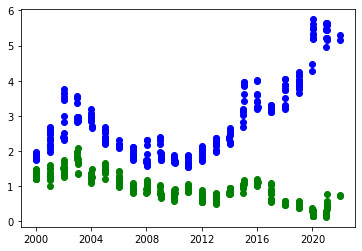

In [479]:
plt.plot(df_concat["Data"],df_concat["Último"], "bo")
plt.plot(df_concat["Data"],df_concat["valor_selic"], "go")

<AxesSubplot:>

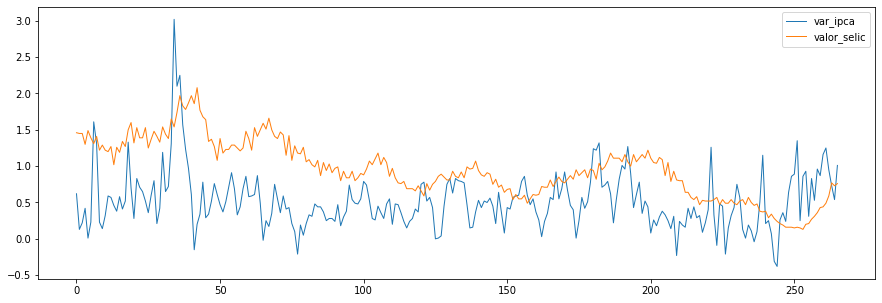

In [480]:
df_concat[["var_ipca", "valor_selic"]].plot.line(figsize=(15,5), linewidth=1)

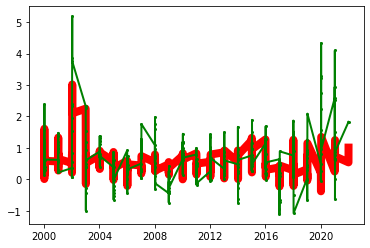

In [341]:
plt.plot(df_concat["Data"],df_concat["var_ipca"], color="red", marker='o', linewidth=8, markersize=2)
plt.plot(df_concat["Data"],df_concat["var_igpm"], color="green", marker='o', linewidth=2, markersize=2)

In [481]:
df_concat = df_concat.reset_index()

### Aplicando Ridge Regression

In [482]:
X = df_concat[["Último", "var_ipca"]]
y = df_concat["valor_selic"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(186, 2)
(80, 2)
(186,)
(80,)


In [483]:
model = Ridge(alpha=1.0)

In [484]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.2018449483674103

In [485]:
y_model_test = model.predict(X_test)
y_model_test

array([0.96766596, 1.12959233, 1.19439358, 1.1016606 , 1.18066146,
       1.08406042, 1.00355826, 0.93344632, 1.08732786, 0.71038467,
       1.05888587, 1.04115608, 0.54936698, 1.03883173, 0.86145443,
       1.08976266, 0.99707677, 1.14755597, 0.95305358, 0.48901602,
       0.60925947, 0.89481914, 1.02115966, 1.03590043, 1.05176099,
       1.02199812, 1.05914349, 0.6879511 , 1.06387748, 1.03165383,
       0.49052394, 0.93185091, 1.12324402, 0.9110017 , 1.16449289,
       1.05137616, 1.04320154, 1.10942384, 0.76830007, 1.06648447,
       1.19670916, 1.0367525 , 0.84729319, 0.68472855, 0.79941674,
       1.0124599 , 0.76713727, 1.13360971, 0.87254293, 0.69969097,
       0.50595637, 1.18258563, 0.71671809, 1.03755997, 0.78593199,
       0.99386935, 0.98454601, 0.99672589, 0.86769783, 1.04611646,
       0.99561859, 0.67043381, 1.00911502, 1.14608755, 1.09964603,
       1.02901894, 0.78391955, 1.04099661, 0.81484316, 1.0462294 ,
       0.67730633, 1.06354744, 0.6785523 , 1.09561367, 0.90602

In [486]:
X_new = pd.DataFrame([], columns = ["selic_real", "selic_prevista"])

In [487]:
X_new["selic_real"] = y_test
X_new["selic_prevista"] = y_model_test
X_new

,selic_real,selic_prevista
185,1.07,0.967666
155,0.55,1.129592
100,0.88,1.194394
11,1.20,1.101661
18,1.50,1.180661
...,...,...
17,1.27,1.031233
127,0.89,1.013197
129,0.81,1.174311
223,0.57,0.631936


In [488]:
import math
mse = mean_squared_error(X_new["selic_real"], X_new["selic_prevista"])
print("mse: " + str(mse))
mae = mean_absolute_error(X_new["selic_real"], X_new["selic_prevista"])
print("mae: " + str(mae))
rmse = math.sqrt(mean_squared_error(X_new["selic_real"], X_new["selic_prevista"]))
print("rmse: " + str(rmse))

mse: 0.12739584683712044
mae: 0.2986986589789583
rmse: 0.356925548030847


## Linear Regression

In [489]:
model_linear = LinearRegression()
linear = model_linear.fit(X_train , y_train)
r2_train = model_linear.score(X_train, y_train)
r2_test = model_linear.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.20
R2 no set de teste: 0.29


In [492]:
y_linear_regression_test = model_linear.predict(X_test)
y_linear_regression_test

array([0.96972314, 1.1328548 , 1.1981384 , 1.10338518, 1.18789502,
       1.08359252, 1.0066806 , 0.93844074, 1.08781527, 0.70627085,
       1.05942757, 1.04169881, 0.5454511 , 1.03756168, 0.85879758,
       1.09246267, 0.99409944, 1.14922318, 0.95447   , 0.48391943,
       0.60957985, 0.89334163, 1.02215204, 1.03966249, 1.05158467,
       1.02286374, 1.06095059, 0.6903867 , 1.07183773, 1.03252483,
       0.48550507, 0.93118103, 1.12732373, 0.90725067, 1.16794865,
       1.05452192, 1.0434935 , 1.11340068, 0.76581432, 1.06502126,
       1.20073721, 1.03566648, 0.84512942, 0.67949277, 0.79796059,
       1.01052806, 0.77142577, 1.1357716 , 0.87502255, 0.69536454,
       0.50138487, 1.19495394, 0.71012445, 1.03734445, 0.78198151,
       0.99492459, 0.98313789, 0.99647241, 0.86595195, 1.04503363,
       1.00134179, 0.67081054, 1.00855477, 1.14920681, 1.10095663,
       1.02933833, 0.78294654, 1.04074016, 0.81336884, 1.04760788,
       0.68026118, 1.06565332, 0.67386904, 1.09669475, 0.90456

In [493]:
X_new_linear = pd.DataFrame([], columns = ["selic_real", "selic_prevista"])
X_new_linear["selic_real"] = y_test
X_new_linear["selic_prevista"] = y_linear_regression_test
X_new_linear

,selic_real,selic_prevista
185,1.07,0.969723
155,0.55,1.132855
100,0.88,1.198138
11,1.20,1.103385
18,1.50,1.187895
...,...,...
17,1.27,1.031968
127,0.89,1.010606
129,0.81,1.177641
223,0.57,0.625642


In [494]:
mse = mean_squared_error(X_new_linear["selic_real"], X_new_linear["selic_prevista"])
print("mse: " + str(mse))
mae = mean_absolute_error(X_new_linear["selic_real"], X_new_linear["selic_prevista"])
print("mae: " + str(mae))
rmse = math.sqrt(mean_squared_error(X_new_linear["selic_real"], X_new_linear["selic_prevista"]))
print("rmse: " + str(rmse))

mse: 0.12697323136048397
mae: 0.29796081705272287
rmse: 0.3563330343379406


### Grid Search - Hyperparameter

In [495]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='r2', verbose=1)

In [496]:
grid_search.best_params_

{'max_features': 0.1, 'n_estimators': 55}

In [497]:
grid_search.best_score_

0.32227787242287853

In [498]:
y_random_forest_test = grid_search.predict(X_test)
y_random_forest_test

array([1.20527273, 0.74890909, 0.91709091, 0.92090909, 1.16890909,
       0.92327273, 1.27054545, 0.70527273, 0.77309091, 0.542     ,
       0.67781818, 1.14145455, 0.36527273, 1.09109091, 1.4       ,
       1.03163636, 1.19418182, 0.91272727, 1.09      , 0.25418182,
       0.49836364, 1.47581818, 1.17963636, 1.33545455, 1.004     ,
       1.27381818, 1.16654545, 0.48418182, 1.44      , 1.16690909,
       0.25418182, 1.17218182, 1.11509091, 1.26145455, 0.888     ,
       1.25818182, 1.06690909, 1.29290909, 0.57454545, 1.04090909,
       0.88163636, 0.848     , 1.02890909, 0.63236364, 0.60490909,
       0.97945455, 0.67309091, 0.84927273, 0.72981818, 0.52727273,
       0.26109091, 1.61090909, 1.054     , 0.80381818, 0.88727273,
       1.23236364, 0.80618182, 1.16690909, 1.04890909, 1.00927273,
       1.35218182, 0.36218182, 1.31781818, 0.852     , 0.872     ,
       0.96436364, 0.55      , 0.792     , 0.74072727, 1.114     ,
       0.58563636, 1.30509091, 0.48945455, 0.84890909, 1.39672

In [499]:
X_new_random = pd.DataFrame([], columns = ["selic_real", "selic_prevista"])
X_new_random["selic_real"] = y_test
X_new_random["selic_prevista"] = y_random_forest_test
X_new_random

,selic_real,selic_prevista
185,1.07,1.205273
155,0.55,0.748909
100,0.88,0.917091
11,1.20,0.920909
18,1.50,1.168909
...,...,...
17,1.27,1.144364
127,0.89,0.965455
129,0.81,0.833091
223,0.57,0.468182


In [500]:
mse = mean_squared_error(X_new_random["selic_real"], X_new_random["selic_prevista"])
print("mse: " + str(mse))
mae = mean_absolute_error(X_new_random["selic_real"], X_new_random["selic_prevista"])
print("mae: " + str(mae))
rmse = math.sqrt(mean_squared_error(X_new_random["selic_real"], X_new_random["selic_prevista"]))
print("rmse: " + str(rmse))

mse: 0.08439878140495867
mae: 0.23660681818181822
rmse: 0.2905146836305502
